<a href="https://colab.research.google.com/github/amanullahshah32/Machine-Learning/blob/main/Logistic_Regression_Practice/RainTomorrow_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [53]:
import pandas as pd

In [54]:
weather_df  = pd.read_csv('/content/drive/MyDrive/Datasets/weatherAUS.csv')
raw_df= weather_df

In [55]:
weather_df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0            NaN           W           44.0          W  ...        71.0   
1            NaN         WNW           44.0        NNW  ...        44.0   
2            NaN         WSW           46.0          W  ...        38.0   
3            NaN          NE           24.0         SE  ...        45.0   
4            NaN           W           41.0        ENE  ...        82.0   
...          ...         ...            ...        ...  ...         ...   
145455       NaN           E           31.0         SE  ...        51.0   
145456       NaN         NNW           22.0         SE  ...        56.0   
145457       NaN           N           37.0         SE  ...        53.0   
145458       NaN          SE           28.0        SSE  ...        51.0   
145459       NaN         NaN            NaN        ESE  ...        62.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0              22.0       1007.7       1007.1       8.0       NaN     16.9   
1              25.0       1010.6       1007.8       NaN       NaN     17.2   
2              30.0       1007.6       1008.7       NaN       2.0     21.0   
3              16.0       1017.6       1012.8       NaN       NaN     18.1   
4              33.0       1010.8       1006.0       7.0       8.0     17.8   
...             ...          ...          ...       ...       ...      ...   
145455         24.0       1024.6       1020.3       NaN       NaN     10.1   
145456         21.0       1023.5       1019.1       NaN       NaN     10.9   
145457         24.0       1021.0       1016.8       NaN       NaN     12.5   
145458         24.0       1019.4       1016.5       3.0       2.0     15.1   
145459         36.0       1020.2       1017.9       8.0       8.0     15.0   

        Temp3pm  RainToday  RainTomorrow  
0          21.8         No            No  
1          24.3         No            No  
2          23.2         No            No  
3          26.5         No            No  
4          29.7         No            No  
...         ...        ...           ...  
145455     22.4         No            No  
145456     24.5         No            No  
145457     26.1         No            No  
145458     26.0         No            No  
145459     20.9         No           NaN  

[145460 rows x 23 columns]

In [56]:
# removing the rows that contains nan values in Rain today and Rain tommorrow columns

weather_df.dropna(subset=['RainToday', 'RainTomorrow'], inplace = True)

# Exploratory Data Analysis and Visualization

In [57]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor']= '#00000000'

In [58]:
px.histogram(weather_df, x='Location', title='Location vs Rainy Days', color='RainToday')

In [59]:
px.histogram(weather_df, x= 'Temp3pm', title='Temperature at 3 pm vs Rain Tommorow', color='RainTomorrow', nbins=1000)

In [60]:
px.histogram(weather_df, x='RainTomorrow', color= 'RainToday', title= 'Rain Tomorrow vs Rain Today')

In [67]:
px.scatter(weather_df, title= 'Min temp vs Max Temp', x='MinTemp', y='MaxTemp', color='RainTomorrow', opacity = 0.7)

In [61]:

px.scatter(weather_df, title= 'Min temp vs Max Temp', x='MinTemp', y='MaxTemp', color='RainToday')

In [62]:
px.scatter(weather_df.sample(2000), title='Temp (3pm) vs. Humidity (3pm)', x='Temp3pm', y='Humidity3pm', color='RainTomorrow' )

In [63]:

px.scatter(weather_df.sample(2000), x='Temp3pm', y='Humidity3pm', color="RainToday", title= 'Temp 3 vs Humidity at 3 pm and Rain today', opacity=0.8)

In [64]:
px.histogram(weather_df.sample(1000), x='Pressure3pm', y='Temp3pm', nbins=1000, opacity=0.8, title='Pressure at 3 pm vs Temp at 3 pm and rain today', color='RainToday')

In [69]:
px.scatter(weather_df.sample(1000), x='Pressure3pm', y='Temp3pm', opacity=0.8, title='Pressure at 3 pm vs Temp at 3 pm and rain today', color='RainTomorrow')

# Training, Validation and Test Sets

In [70]:
from sklearn.model_selection import train_test_split


In [71]:
train_val_df, test_df = train_test_split(weather_df, test_size= 0.2, random_state=42)
train_df, val_df  = train_test_split(train_val_df, test_size  = 0.25, random_state= 42)

In [72]:
print('train_df.shape: ', train_df.shape)
print('val_df.shape: ', val_df.shape)
print('test_df.shape: ', test_df.shape)

train_df.shape:  (84471, 23)
val_df.shape:  (28158, 23)
test_df.shape:  (28158, 23)


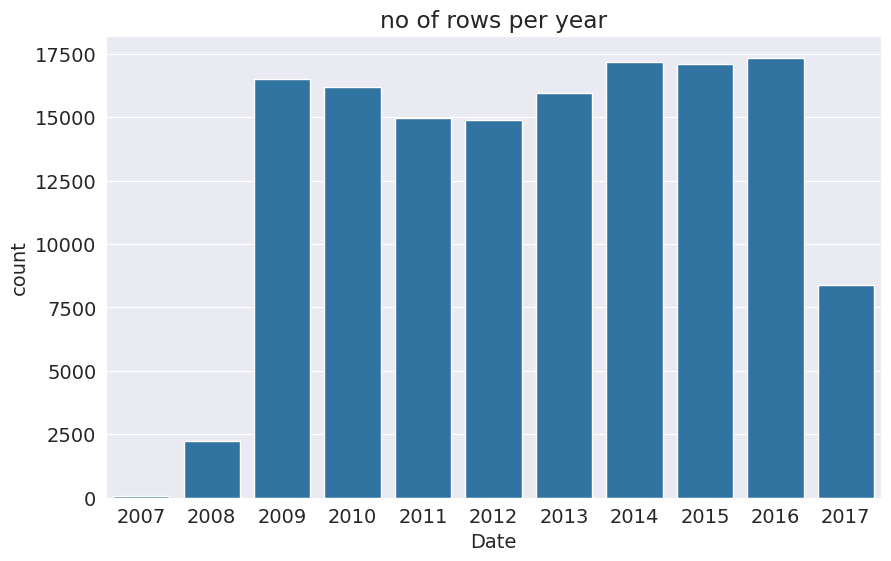

In [75]:
sns.countplot(x= pd.to_datetime(weather_df.Date).dt.year)
plt.title('no of rows per year')
plt.show()

In [81]:
year = pd.to_datetime(weather_df.Date).dt.year

train_df = weather_df[year<2015]
val_df = weather_df[year == 2015]
test_df = weather_df[year>2015]

In [82]:
print('train_df.shape: ', train_df.shape)
print('val_df.shape: ', val_df.shape)
print('test_df.shape: ', test_df.shape)

train_df.shape:  (97988, 23)
val_df.shape:  (17089, 23)
test_df.shape:  (25710, 23)


In [ ]:
%%time
test_df

# Identifying Input and Target Columns




In the current dataset, we can ignore the Date column, since we only want to weather conditions to make a prediction about whether it will rain the next day.

Let's create a list of input columns, and also identify the target column.

In [86]:
input_cols = list(train_df.columns)[1:-1]
target_col = 'RainTomorrow'

In [93]:
print(input_cols)

['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']


In [94]:
print(target_col)

RainTomorrow


###We can now create inputs and targets for the training, validation and test sets for further processing and model training.

In [95]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [97]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

In [99]:
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

In [ ]:
train_inputs

In [101]:
train_targets

0         No
1         No
2         No
3         No
4         No
          ..
144548    No
144549    No
144550    No
144551    No
144552    No
Name: RainTomorrow, Length: 97988, dtype: object

Let's also identify which of the columns are numerical and which ones are categorical. This will be useful later, as we'll need to convert the categorical data to numbers for training a logistic regression model.

In [102]:
import numpy as np

In [104]:
numeric_cols = train_inputs.select_dtypes(include = np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

In [107]:
print(numeric_cols)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [106]:
categorical_cols

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [108]:
train_inputs[numeric_cols].describe()

MinTemp       MaxTemp      Rainfall   Evaporation      Sunshine  \
count  97674.000000  97801.000000  97988.000000  61657.000000  57942.000000   
mean      12.007831     23.022202      2.372935      5.289991      7.609004   
std        6.347175      6.984397      8.518819      3.952010      3.788813   
min       -8.500000     -4.100000      0.000000      0.000000      0.000000   
25%        7.500000     17.900000      0.000000      2.600000      4.800000   
50%       11.800000     22.400000      0.000000      4.600000      8.500000   
75%       16.600000     27.900000      0.800000      7.200000     10.600000   
max       33.900000     48.100000    371.000000     82.400000     14.300000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm   Humidity9am   Humidity3pm  \
count   91160.000000  97114.000000  96919.000000  96936.000000  96872.000000   
mean       40.215873     14.092263     18.764608     68.628745     51.469547   
std        13.697967      8.984203      8.872398     19.003097     20.756113   
min         6.000000      0.000000      0.000000      0.000000      0.000000   
25%        31.000000      7.000000     13.000000     57.000000     37.000000   
50%        39.000000     13.000000     19.000000     70.000000     52.000000   
75%        48.000000     19.000000     24.000000     83.000000     66.000000   
max       135.000000     87.000000     87.000000    100.000000    100.000000   

        Pressure9am   Pressure3pm      Cloud9am      Cloud3pm       Temp9am  \
count  88876.000000  88857.000000  63000.000000  61966.000000  97414.000000   
mean    1017.513734   1015.132352      4.302952      4.410677     16.835126   
std        7.072510      6.997072      2.866634      2.693370      6.404586   
min      980.500000    979.000000      0.000000      0.000000     -5.900000   
25%     1012.800000   1010.400000      1.000000      2.000000     12.200000   
50%     1017.500000   1015.100000      5.000000      5.000000     16.600000   
75%     1022.300000   1019.900000      7.000000      7.000000     21.400000   
max     1041.000000   1039.600000      9.000000      9.000000     40.200000   

            Temp3pm  
count  97392.000000  
mean      21.540138  
std        6.831612  
min       -5.100000  
25%       16.600000  
50%       20.900000  
75%       26.200000  
max       46.100000

In [109]:
train_inputs[categorical_cols].describe()

Location WindGustDir WindDir9am WindDir3pm RainToday
count      97988       91120      90969      96036     97988
unique        49          16         16         16         2
top     Canberra           W          N         SE        No
freq        2506        6672       8012       7603     76002

# Imputing Missing Numeric Data
There are several techniques for imputation, but we'll use the most basic one: replacing missing values with the average value in the column using the SimpleImputer class from sklearn.impute.

In [110]:
from sklearn.impute import SimpleImputer

In [111]:
imputer = SimpleImputer(strategy='mean')

Before we perform imputation, let's check the no. of missing values in each numeric column.



In [ ]:
weather_df[numeric_cols].isna().sum()

In [ ]:
train_inputs[numeric_cols].isna().sum()

The first step in imputation is to fit the imputer to the data i.e. compute the chosen statistic (e.g. mean) for each column in the dataset.

In [116]:
imputer.fit(weather_df[numeric_cols])

SimpleImputer()

In [117]:
list(imputer.statistics_)

[12.18482386562048,
 23.235120301822324,
 2.349974074310839,
 5.472515506887154,
 7.630539861047281,
 39.97051988882308,
 13.990496092519967,
 18.631140782316862,
 68.82683277087672,
 51.44928834695453,
 1017.6545771543717,
 1015.2579625879797,
 4.431160817585808,
 4.499250233195188,
 16.98706638787991,
 21.69318269001107]

The missing values in the training, test and validation sets can now be filled in using the transform method of imputer.



In [118]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

In [119]:
train_inputs[numeric_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

In [120]:
import numpy as np
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit([[1, 2], [np.nan, 3], [7, 6]])
X = [[np.nan, 2], [6, np.nan], [7, 6]]
print(imp.transform(X))

[[4.         2.        ]
 [6.         3.66666667]
 [7.         6.        ]]


## Trying other Imputation Techniques